In [78]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from scipy.stats import sem, t
from scipy import mean

In [55]:
data = pd.read_csv('prepared Data.csv')
print(data.shape)
data.head()


(922, 33)


,gender,age,SBP,BMI,etiology of CKD,Hb,Alb,Cr,eGFR,CKD_stage,...,eGFR(6M),eGFR(12M),eGFR(18M),eGFR(24M),eGFR(30M),eGFR(36M),eGFR(last visit),average_obs,obsevasion_ duration,fclass
0,2,74,120.0,23.137669,2,12.0,4.0,1.20,89.981926,3,...,26.454698,24.331582,24.682189,21.614854,20.420524,20.420524,18.495328,25.275139,37,0
1,1,57,139.0,28.515625,2,15.9,4.8,0.84,88.330020,2,...,78.287758,71.343858,72.845992,71.908942,71.562914,67.225032,67.225032,72.392152,37,0
2,1,32,154.0,24.582701,4,14.4,4.4,0.87,86.973875,2,...,75.027238,69.595257,68.856399,72.901926,69.749275,69.171408,69.171408,72.694258,36,0
3,1,60,144.0,30.737407,2,14.4,4.7,2.22,86.874201,4,...,26.885061,24.917353,28.581660,29.237135,25.556002,25.183703,25.183703,26.485251,35,0
4,1,49,135.0,23.758726,2,17.0,4.1,1.39,86.782629,3,...,46.978867,45.829455,41.488436,41.801561,38.106104,38.106104,38.106104,43.081581,30,0


In [56]:
data.columns

Index(['gender', 'age', 'SBP', 'BMI', 'etiology of CKD', 'Hb', 'Alb', 'Cr',
       'eGFR', 'CKD_stage', 'CKD category', 'dip-stick proteinuria',
       'proteinuria', 'urinary occult blood', 'UPCR', 'UPCR category',
       'hypertension', 'prevalence of CVD', 'diabetes', 'use of RAASi',
       'use of CCB', 'use of diuretics', 'eGFR(0M)', 'eGFR(6M)', 'eGFR(12M)',
       'eGFR(18M)', 'eGFR(24M)', 'eGFR(30M)', 'eGFR(36M)', 'eGFR(last visit)',
       'average_obs', 'obsevasion_ duration', 'fclass'],
      dtype='object')

In [57]:
count = Counter(data['fclass'])
count


Counter({0: 611, 1: 170, 5: 51, 2: 42, 6: 48})

In [58]:
cat0 = shuffle(data[data['fclass']==0])
cat1 = shuffle(data[data['fclass']==1])
cat2 = shuffle(data[data['fclass']==2])
cat5 = shuffle(data[data['fclass']==5])
cat6 = shuffle(data[data['fclass']==6])


In [72]:

lenCat0 = len(cat0.iloc[:,0])
lenCat1 = len(cat1.iloc[:,0])
lenCat2 = len(cat2.iloc[:,0])
lenCat5 = len(cat5.iloc[:,0])
lenCat6 = len(cat6.iloc[:,0])


In [79]:
methodList = []
accRes = []
accConf = []
# sensitivityList = []
# specificityList = []

In [80]:
for j in range(10):
    
    i = j*.1
    k = (j+1)*.1
    #train
    X_train = cat0.iloc[int(k * lenCat0):,:-1].append(\
              cat1.iloc[int(k * lenCat1):,:-1].append(\
              cat2.iloc[int(k * lenCat2):,:-1].append(\
              cat5.iloc[int(k * lenCat5):,:-1].append(\
              cat6.iloc[int(k * lenCat6):,:-1].append(\
              cat0.iloc[:int(i * lenCat0),:-1].append(\
              cat1.iloc[:int(i * lenCat1),:-1].append(\
              cat2.iloc[:int(i * lenCat2),:-1].append(\
              cat5.iloc[:int(i * lenCat5),:-1].append(\
              cat6.iloc[:int(i * lenCat6),:-1]                                       
                                                     )))))))))

    y_train = cat0.iloc[int(k * lenCat0):,-1].append(\
              cat1.iloc[int(k * lenCat1):,-1].append(\
              cat2.iloc[int(k * lenCat2):,-1].append(\
              cat5.iloc[int(k * lenCat5):,-1].append(\
              cat6.iloc[int(k * lenCat6):,-1].append(\
              cat0.iloc[:int(i * lenCat0),-1].append(\
              cat1.iloc[:int(i * lenCat1),-1].append(\
              cat2.iloc[:int(i * lenCat2),-1].append(\
              cat5.iloc[:int(i * lenCat5),-1].append(\
              cat6.iloc[:int(i * lenCat6),-1]                                         
                                                    )))))))))
    print(X_train.shape, y_train.shape)

    #test
    X_test = cat0.iloc[int(i * lenCat0):int(k * lenCat0),:-1].append(\
             cat1.iloc[int(i * lenCat1):int(k * lenCat1),:-1].append(\
             cat2.iloc[int(i * lenCat2):int(k * lenCat2),:-1].append(\
             cat5.iloc[int(i * lenCat5):int(k * lenCat5),:-1].append(\
             cat6.iloc[int(i * lenCat6):int(k * lenCat6),:-1]))))

    y_test = cat0.iloc[int(i * lenCat0):int(k * lenCat0),-1].append(\
             cat1.iloc[int(i * lenCat1):int(k * lenCat1),-1].append(\
             cat2.iloc[int(i * lenCat2):int(k * lenCat2),-1].append(\
             cat5.iloc[int(i * lenCat5):int(k * lenCat5),-1].append(\
             cat6.iloc[int(i * lenCat6):int(k * lenCat6),-1]))))
    print(X_test.shape, y_test.shape)
    #preprocessing
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    X_test_transformed = scaler.transform(X_test)
    loologreg = LogisticRegression()
    loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
    predict = np.array(loologreg.predict(X_test))
    cnf_matrix = metrics.confusion_matrix(y_test, predict)

    print(cnf_matrix)

    acc = metrics.accuracy_score(y_test.values, predict)
    print("Logistic Regression Accuracy by LOOCV", acc)
    accList.append(acc)
    



(831, 32) (831,)
(91, 32) (91,)
[[59  2  0  0  0]
 [ 3 14  0  0  0]
 [ 4  0  0  0  0]
 [ 4  1  0  0  0]
 [ 1  1  0  0  2]]
Logistic Regression Accuracy by LOOCV 0.8241758241758241
(830, 32) (830,)
(92, 32) (92,)
[[60  0  0  0  1]
 [ 1 14  0  0  2]
 [ 3  0  1  0  0]
 [ 5  0  0  0  0]
 [ 0  4  0  0  1]]
Logistic Regression Accuracy by LOOCV 0.8260869565217391
(830, 32) (830,)
(92, 32)

/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

 (92,)
[[60  1  0  0  0]
 [ 2 14  0  0  1]
 [ 2  2  0  0  0]
 [ 5  0  0  0  0]
 [ 1  4  0  0  0]]
Logistic Regression Accuracy by LOOCV 0.8043478260869565
(830, 32) (830,)
(92, 32) (92,)
[[60  1  0  0  0]
 [ 1 16  0  0  0]
 [ 2  1  1  0  0]
 [ 5  0  0  0  0]
 [ 0  5  0  0  0]]
Logistic Regression Accuracy by LOOCV 0.8369565217391305


/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

(829, 32) (829,)
(93, 32) (93,)
[[58  2  1  0  0]
 [ 6 10  0  0  1]
 [ 1  4  0  0  0]
 [ 5  0  0  0  0]
 [ 1  3  0  0  1]]
Logistic Regression Accuracy by LOOCV 0.7419354838709677
(831, 32) (831,)
(91, 32) (91,)
[[60  0  1  0  0]
 [ 0 15  0  0  2]
 [ 3  1  0  0  0]
 [ 5  0  0  0  0]
 [ 0  3  0  0  1]]
Logistic Regression Accuracy by LOOCV 0.8351648351648352


/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

(830, 32) (830,)
(92, 32) (92,)
[[60  0  0  0  1]
 [ 0 15  2  0  0]
 [ 3  0  1  0  0]
 [ 5  0  0  0  0]
 [ 0  4  0  0  1]]
Logistic Regression Accuracy by LOOCV 0.8369565217391305
(830, 32) (830,)
(92, 32) (92,)
[[58  3  0  0  0]
 [ 1 14  0  0  2]
 [ 2  0  1  0  1]
 [ 5  0  0  0  0]
 [ 0  3  1  0  1]]
Logistic Regression Accuracy by LOOCV 0.8043478260869565


/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

(830, 32) (830,)
(92, 32) (92,)
[[56  3  2  0  0]
 [ 0 14  1  0  2]
 [ 4  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  4  0  0  0]]
Logistic Regression Accuracy by LOOCV 0.7608695652173914
(827, 32) (827,)
(95, 32) (95,)
[[61  1  0  0  0]
 [ 1 16  0  0  0]
 [ 5  0  0  0  0]
 [ 6  0  0  0  0]
 [ 0  5  0  0  0]]
Logistic Regression Accuracy by LOOCV 0.8105263157894737


/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [81]:

methodList.append('Logistic Regression')
confidence = 0.95
# data = [1, 2, 3, 4, 5]

naccList = len(accList)
maccList = np.mean(accList)
std_erraccList = sem(accList)
haccList = std_erraccList * t.ppf((1 + confidence) / 2, naccList - 1)




print("Accuracy:         "+ str(round(maccList,2)) + '  -+' + str(round(haccList,4)))
accRes.append(round(maccList,2))
accConf.append(round(haccList,4))

Accuracy:         0.81  -+0.0234


In [75]:
loologreg = LogisticRegression()
loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
predict = np.array(loologreg.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y_test.values, predict)
print("Logistic Regression Accuracy by LOOCV", acc)

[[61  1  0  0  0]
 [ 1 16  0  0  0]
 [ 5  0  0  0  0]
 [ 6  0  0  0  0]
 [ 0  5  0  0  0]]
Logistic Regression Accuracy by LOOCV 0.8105263157894737


/home/amin/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


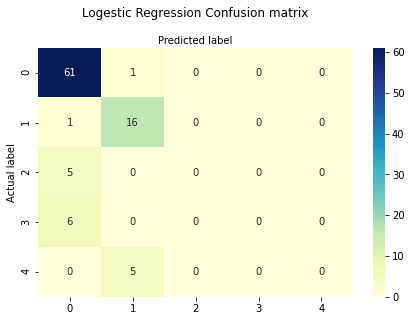

In [76]:
#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


In [77]:
accList

[0.8105263157894737]

In [ ]:
result = []
result = pd.DataFrame(result)
result['Method'],result['Accuracy'],result['ACC CI'] = methodList,accRes,accConf
result.to_excel('kidney_Classification_Result.xlsx',index=False)